# What patterns can we find in the data that are correlated with increases and decreases in the number of parking tickets issued by newyork city parking authority ? 

## importing necessary library

In [1]:
import dask.dataframe as dd # for lazy evaluation 
from dask.diagnostics import ProgressBar #to see progress of the process
import pandas as pd #data processing
import numpy as np # linear algebra
import seaborn as sns # for plotting the data
import matplotlib.pyplot as plt
import numpy as np #linear algebra

In [2]:
 #read data through dask 
df1 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
df2 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2015.csv")
df3 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2016.csv")
df4 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [3]:
from functools import reduce

In [4]:
# give list of common_columns of all dataframe
columns = [set(df1.columns),set(df2.columns),set(df3.columns),set(df4.columns)]
common_columns = list(reduce(lambda x,y: x.intersection(y),columns))

In [5]:
common_columns

['Days Parking In Effect    ',
 'Vehicle Make',
 'Issuer Command',
 'Violation Time',
 'Summons Number',
 'Violation County',
 'Violation Precinct',
 'Violation Post Code',
 'Unregistered Vehicle?',
 'Violation Location',
 'Vehicle Year',
 'Sub Division',
 'Double Parking Violation',
 'Issuer Precinct',
 'Feet From Curb',
 'Street Name',
 'Date First Observed',
 'Violation Code',
 'Street Code2',
 'Time First Observed',
 'To Hours In Effect',
 'Plate Type',
 'Violation Description',
 'Issuing Agency',
 'House Number',
 'Violation In Front Of Or Opposite',
 'Law Section',
 'Street Code1',
 'Plate ID',
 'From Hours In Effect',
 'Registration State',
 'Issuer Squad',
 'No Standing or Stopping Violation',
 'Meter Number',
 'Violation Legal Code',
 'Vehicle Expiration Date',
 'Vehicle Body Type',
 'Vehicle Color',
 'Issuer Code',
 'Street Code3',
 'Hydrant Violation',
 'Intersecting Street',
 'Issue Date']

## coverting variables datatypes to its origin datatype

In [6]:
dtypes={'Date First Observed': np.str,
 'Days Parking In Effect    ': np.str,
 'Double Parking Violation': np.str,
 'Feet From Curb': np.float32,
 'From Hours In Effect': np.str,
 'House Number': np.str,
 'Hydrant Violation': np.str,
 'Intersecting Street': np.str,
 'Issue Date': np.str,
 'Issuer Code': np.float32,
 'Issuer Command': np.str,
 'Issuer Precinct': np.float32,
 'Issuer Squad': np.str,
 'Issuing Agency': np.str,
 'Law Section': np.float32,
 'Meter Number': np.str,
 'No Standing or Stopping Violation': np.str,
 'Plate ID': np.str,
 'Plate Type': np.str,
 'Registration State': np.str,
 'Street Code1': np.uint32,
 'Street Code2': np.uint32,
 'Street Code3': np.uint32,
 'Street Name': np.str,
 'Sub Division': np.str,
 'Summons Number': np.uint32,
 'Time First Observed': np.str,
 'To Hours In Effect': np.str,
 'Unregistered Vehicle?': np.str,
 'Vehicle Body Type': np.str,
 'Vehicle Color': np.str,
 'Vehicle Expiration Date': np.str,
 'Vehicle Make': np.str,
 'Vehicle Year': np.float32,
 'Violation Code': np.uint16,
 'Violation County': np.str,
 'Violation Description': np.str,
 'Violation In Front Of Or Opposite': np.str,
 'Violation Legal Code': np.str,
 'Violation Location': np.str,
 'Violation Post Code': np.str,
 'Violation Precinct': np.float32,
 'Violation Time': np.str
       }

nyc_data = dd.read_csv('./*.csv', dtype=dtypes, usecols=dtypes.keys()) #read common_columns of all dataframe and convert them into one dataframe

In [7]:
nyc_data

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=178,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,uint32,object,object,object,object,uint16,object,object,object,uint32,uint32,uint32,object,object,float32,float32,float32,object,object,object,object,object,object,object,object,object,object,float32,object,object,object,object,object,object,object,float32,object,float32,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [9]:
#show percentage of nan values of particular columns
missing_values = nyc_data.isnull().sum()
with ProgressBar():
    percent_missing = ((missing_values / nyc_data.index.size) * 100).compute()
percent_missing


[########################################] | 100% Completed |  5min 21.4s


Summons Number                        0.000000
Plate ID                              0.020867
Registration State                    0.000000
Plate Type                            0.000000
Issue Date                            0.000000
Violation Code                        0.000000
Vehicle Body Type                     0.564922
Vehicle Make                          0.650526
Issuing Agency                        0.000000
Street Code1                          0.000000
Street Code2                          0.000000
Street Code3                          0.000000
Vehicle Expiration Date               0.000002
Violation Location                   15.142846
Violation Precinct                    0.000002
Issuer Precinct                       0.000002
Issuer Code                           0.000002
Issuer Command                       15.018851
Issuer Squad                         15.022566
Violation Time                        0.019207
Time First Observed                  90.040886
Violation Cou

In [18]:
#drop columns which has more than 1% nan value
columns_to_drop = list(percent_missing[percent_missing >= 1].index)
nyc_data_new = nyc_data.drop(columns_to_drop, axis=1)

In [19]:
nyc_data_new.dtypes

Summons Number              uint32
Plate ID                    object
Registration State          object
Plate Type                  object
Issue Date                  object
Violation Code              uint16
Vehicle Body Type           object
Vehicle Make                object
Issuing Agency              object
Street Code1                uint32
Street Code2                uint32
Street Code3                uint32
Vehicle Expiration Date     object
Violation Precinct         float32
Issuer Precinct            float32
Issuer Code                float32
Violation Time              object
Street Name                 object
Date First Observed         object
Law Section                float32
Sub Division                object
Vehicle Year               float32
Feet From Curb             float32
dtype: object

In [20]:
nyc_data_new.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Precinct,Issuer Precinct,Issuer Code,Violation Time,Street Name,Date First Observed,Law Section,Sub Division,Vehicle Year,Feet From Curb
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,33.0,33.0,921043.0,0752A,W 175 ST,0,408.0,F1,2013.0,0.0
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,33.0,33.0,921043.0,1240P,W 177 ST,0,408.0,C,2012.0,0.0
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,33.0,33.0,921043.0,1243P,W 163 ST,0,408.0,F7,0.0,0.0
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,33.0,33.0,921043.0,0232P,W 176 ST,0,408.0,F1,2010.0,0.0
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,33.0,33.0,921043.0,1239P,W 174 ST,0,408.0,E1,2012.0,0.0


In [21]:
with ProgressBar():
    display(nyc_data_new[['Plate Type','Registration State']].compute())

[########################################] | 100% Completed |  4min 53.1s


,Plate Type,Registration State
0,PAS,NY
1,COM,NY
2,COM,NY
3,COM,NY
4,COM,NY
...,...,...
229472,PAS,NJ
229473,PAS,NY
229474,PAS,PA
229475,PAS,NY


In [22]:
nyc_data_new.shape

(Delayed('int-7fe118ad-1f1f-49ec-9310-b0282722922d'), 23)

In [23]:
#taking sample data for easy calculation
sample_new_data = nyc_data_new.sample(frac = 0.1, replace = False)

In [24]:
with ProgressBar():
    sample_new_data.compute()

[########################################] | 100% Completed |  4min 28.4s


## plotting 'registration state' data 

ValueError: Arrays chunk sizes are unknown: (nan,)

A possible solution: https://docs.dask.org/en/latest/array-chunks.html#unknown-chunks
Summary: to compute chunks sizes, use

   x.compute_chunk_sizes()  # for Dask Array `x`
   ddf.to_dask_array(lengths=True)  # for Dask DataFrame `ddf`

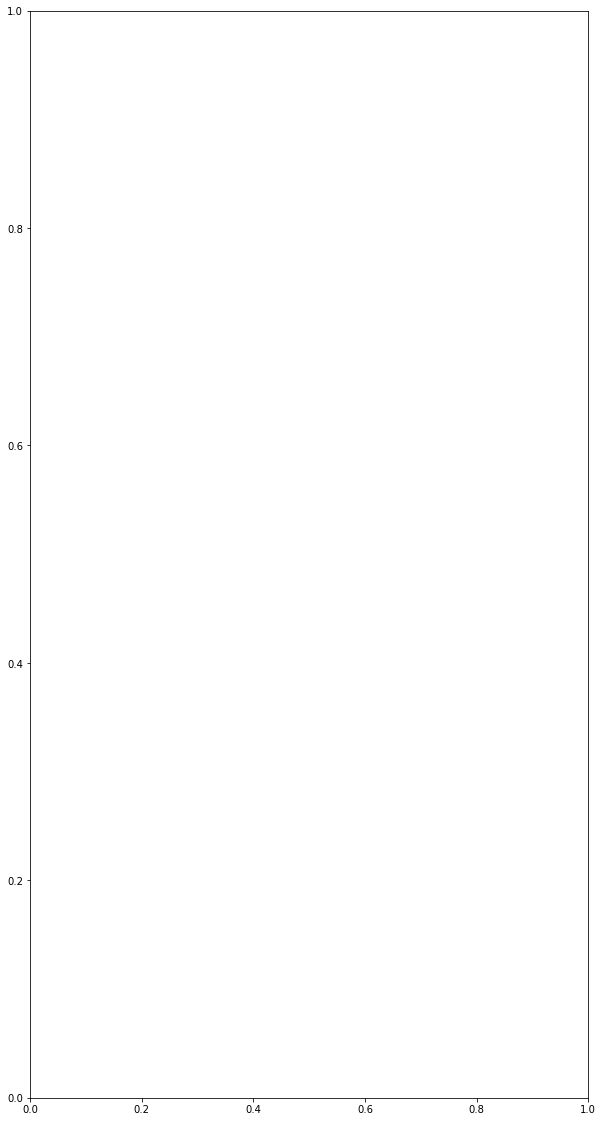

In [73]:
x_ticks = sample_new_data['Registration State'].value_counts().index
heights = sample_new_data['Registration State'].value_counts()
y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(10,20)) 
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks)
 
# Show graphic
plt.show()

## How the number of tickets given changes with each month?

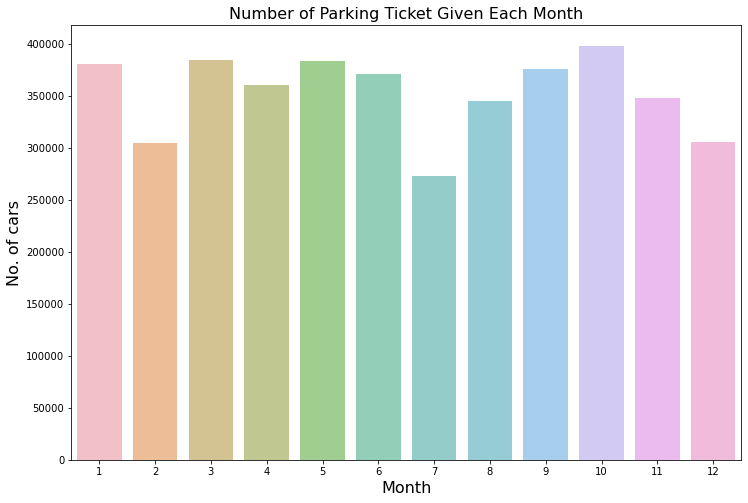

In [25]:
month = []
for time_stamp in pd.to_datetime(sample_new_data['Issue Date']):
    month.append(time_stamp.month)
m_count = pd.Series(month).value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=m_count.values, x=m_count.index, alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of cars", fontsize=16)
plt.show();


## >>>>correlation matrix is a table showing correlation coefficients between variables.


In [30]:
correlation_matrix=nyc_data_new.corr( method='pearson') 

In [31]:
correlation_matrix.head()   

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Violation Precinct,Issuer Precinct,Issuer Code,Law Section,Vehicle Year,Feet From Curb
Summons Number,1.000000,0.080118,0.324586,0.214768,0.224672,0.302288,0.126804,0.094536,-0.703685,-0.129257,0.040069
Violation Code,0.080118,1.000000,0.085219,0.094581,0.094990,0.175573,0.131635,0.232991,-0.231190,0.008802,0.039156
Street Code1,0.324586,0.085219,1.000000,0.425152,0.423669,0.383627,0.233090,0.311345,-0.472149,-0.092881,0.032160
Street Code2,0.214768,0.094581,0.425152,1.000000,0.670815,0.319657,0.212063,0.321989,-0.388299,-0.070361,0.013748
Street Code3,0.224672,0.094990,0.423669,0.670815,1.000000,0.322557,0.211284,0.318284,-0.394844,-0.071838,0.013485


## The possible range of values for the correlation coefficient is -1.0 to 1.0. In other words, the values cannot exceed 1.0 or be less than -1.0. A correlation of -1.0 indicates a perfect negative correlation, and a correlation of 1.0 indicates a perfect positive correlation. If the correlation coefficient is greater than zero, it is a positive relationship. Conversely, if the value is less than zero, it is a negative relationship. A value of zero indicates that there is no relationship between the two variables.

<AxesSubplot:>

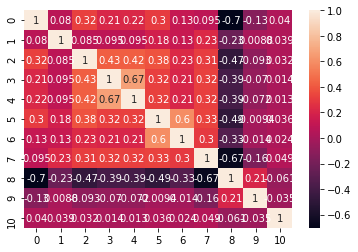

In [71]:
import seaborn as sns

sns.heatmap(nyc_data_new.corr(), annot = True)
